In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

### load the data

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

### data understanding

In [5]:
x_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

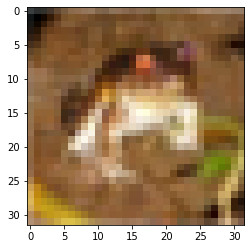

In [7]:
plt.imshow(x_train[0])

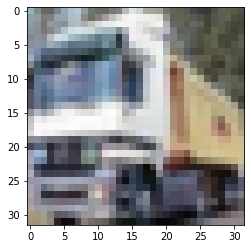

In [8]:
def plot_sample(i):
   #keras.utils.array_to_img(x_train[2])    
    plt.imshow(x_train[i])

plot_sample(1)

In [9]:
#https://www.cs.toronto.edu/~kriz/cifar.html
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def print_label(i):
    print(classes[y_train[i][0]])

print_label(1)

truck


### Scale X data

In [11]:
np.max(x_train)

x_train_scaled = x_train / np.max(x_train)
x_test_scaled = x_test / np.max(x_train)

In [12]:
np.max(x_train_scaled) , np.min(x_train_scaled) , np.median(x_train_scaled)

(1.0, 0.0, 0.4588235294117647)

### Encoding Y data (OHE)

In [13]:
np.transpose(y_train[:9])
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
y_train_categ = keras.utils.to_categorical(y_train , num_classes=len(np.unique(y_train)) , dtype='float32')
y_test_categ = keras.utils.to_categorical(y_test , num_classes=len(np.unique(y_train)) , dtype='float32')

In [15]:
y_train[:3] # in NN we use loss='sparse_categorigal_crossentropy'

array([[6],
       [9],
       [9]], dtype=uint8)

In [19]:
y_train_categ[:3] # in NN we use loss='categorical_crossentropy'

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Model

In [20]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [21]:
32*32*3

3072

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_scaled , y_train_categ , epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 3ms/step - loss: 2.1148 - accuracy: 0.2174
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8665 - accuracy: 0.3263
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7724 - accuracy: 0.3641
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7227 - accuracy: 0.3786
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6907 - accuracy: 0.3912
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6606 - accuracy: 0.4041
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6370 - accuracy: 0.4143
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6162 - accuracy: 0.4216
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5991 - accuracy: 0.4268
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.58

In [23]:
y_pred = model.predict(x_test_scaled)

313/313 [==============================] - 1s 3ms/step


In [24]:
np.argmax(x_test_scaled[0])

2421

In [25]:
np.argmax(y_pred[0])

3

In [26]:
classes[np.argmax(y_pred[0])]

'cat'